Assumptions of Linear Regression explains in detail with an example using any of your choice Case study from Kaggle

In [1]:
#new dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
#to load dataset
df=pd.read_csv('advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 5)

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
#predict sales i.e. continous numerical value apply Regression
#first check null 
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

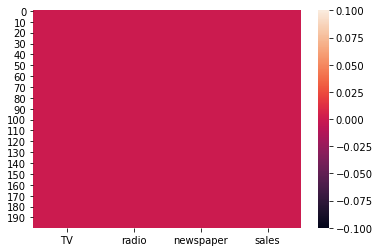

In [6]:
#visualize
sns.heatmap(df.isnull())
plt.show()

In [7]:
#to check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


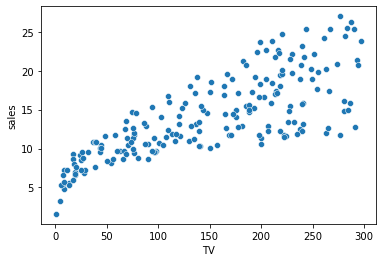

In [8]:
#to check relation between input and output
sns.scatterplot(data=df,x='TV',y='sales')
plt.show()

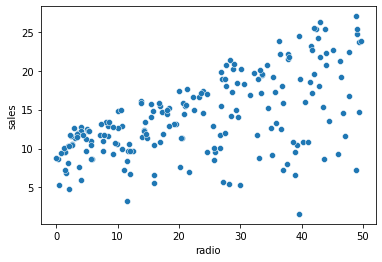

In [9]:
sns.scatterplot(data=df,x='radio',y='sales')
plt.show()

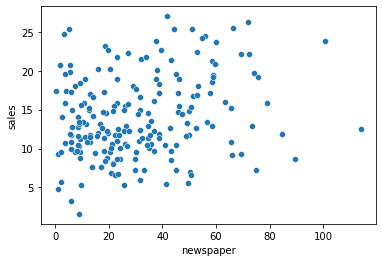

In [10]:
#no correlation
sns.scatterplot(data=df,x='newspaper',y='sales')
plt.show()

In [11]:
#to check correlation value between input and output
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [12]:
#TV has high degree correlation
#and radio has moderate correlation

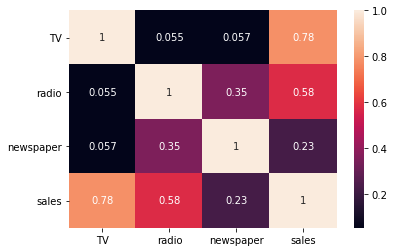

In [13]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [14]:
#work on first assumption
#First there should be no multicolinearity
# Multicolinearity means here radio is correlated with sales and newspaper (I/P)
#is correlated with radio(Input) corr value 0.35 that means indirectly newspaper
#also getting corelated with sales
#here correlated with newspaper and sales =0.23 it is bad correlation
#So in this case , remove any one input(radio and newspaper)but which input
#will be remove so we remove those input whose bad correlation with output
#here newspaper is bad correlated with output sales then remove newspaper 
#column means newspaper column input is not imp to predict the value
#of sales(o/p)

In [15]:
#corr value of radio with sales :  0.58  
#corr value of newspaper with sales : 0.23
#corr value of radio and newspaper(both are input and correlated each other:0.35
#so we decided , remove newspaper because corr of radio with sales>newspaper with sales
#We have input TV and radio and target sales
X=df[["TV","radio"]] #input TV and radio : 2D array
Y=df["sales"] #output which want to predict : always 1 D array

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [18]:
from sklearn.linear_model import LinearRegression
#create object LR
lr=LinearRegression()

In [19]:
lr.fit(x_train,y_train)

LinearRegression()

In [20]:
lr.coef_

array([0.04697554, 0.17765046])

In [21]:
lr.intercept_ #intercept is same

2.9647671191401574

In [22]:
#Test the model means use inbuilt function predict()  : inbuilt method of
#LinearRegression class
#perform testing
y_pred=lr.predict(x_test)
y_pred

array([21.6786746 , 16.43892004,  7.70903733, 17.92158421, 18.67111499,
       23.74835071, 16.24962798, 13.37657045,  9.12364788, 17.27585015,
       14.40513872,  9.85730919, 17.31402746, 16.61437382, 15.02857874,
       15.42489496, 12.42021473, 17.34892466, 11.09570896, 18.10320281,
        9.38655615, 12.65171582,  8.70947008, 10.49704698, 11.35942404,
       15.03043294,  9.73268033, 19.46660993, 18.26160716, 17.21035792,
       21.60669421, 14.58454377, 16.32136242, 12.3456783 , 19.99853614,
       15.38120487, 14.01613968, 10.05601014, 20.94792024,  7.45626202,
        3.65120693,  7.26465144,  5.99278035, 18.39717578,  8.2996665 ,
       14.13011074, 14.95229617, 20.37261349, 20.60678937, 19.48376432,
       24.08819667, 14.89416249,  6.71850002, 19.74995269, 18.99448081,
       12.52042181, 14.18823598,  6.09331077, 15.39558485,  9.58586241])

In [23]:
#MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

1.9147050289721788

In [24]:
#r2 score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9230321850256801

In [25]:
#2.Assumption there should be linear realtionship
#Visualize scatterplot
#find the residuals
residuals=y_test-y_pred
residuals

58     2.121325
40     0.161080
34     1.790963
102   -3.121584
184   -1.071115
198    1.751649
95     0.650372
4     -0.476570
29     1.376352
168   -0.175850
171    0.094861
18     1.442691
11     0.085973
89     0.085626
110   -1.628579
118    0.475105
159    0.479785
35    -4.548925
136   -1.595709
59     0.296797
51     1.313444
16    -0.151716
44    -0.209470
94     1.002953
31     0.540576
162   -0.130433
38     0.367320
28    -0.566610
193    1.338393
27    -1.310358
47     1.593306
165   -2.684544
194    0.978638
177   -0.645678
176    0.201464
97     0.118795
174   -2.516140
73     0.943990
69     1.352080
172    0.143738
108    1.648793
107    1.435349
189    0.707220
14     0.602824
56    -2.799666
19     0.469889
114   -0.352296
39     1.127387
185    1.993211
124    0.216236
98     1.311803
123    0.305838
119   -0.118500
53     1.450047
33    -1.594481
179    0.079578
181   -1.988236
106    1.106689
199   -1.995585
138    0.014138
Name: sales, dtype: float64

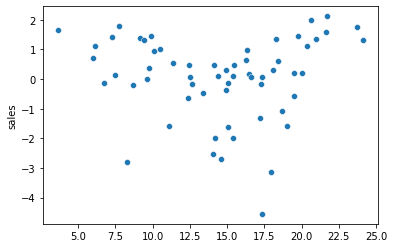

In [26]:
sns.scatterplot(y_pred,residuals)
plt.show()

In [27]:
# in above scatterplot, There is no linear relation between Y_pred
# and residules means no relation between x=["TV","radio"] with sales o/p
#means this assumption is not fullfill

In [28]:
#3. Assumption :  if occur linear relation then next check relation is 
#homoscedastic not a heteroscedastic

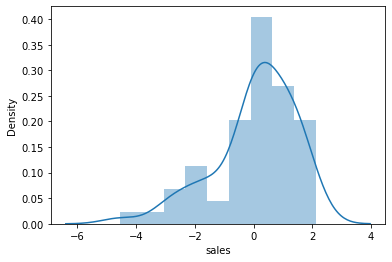

-1.065988117969208


In [29]:
sns.distplot(residuals)
plt.show()
from scipy.stats import skew
print(skew(residuals))

In [30]:
#here we handled multicolinearity (removed multicolinearity)
#but there is no relation relationship 
##relation should be homoscedastic : means datapoints are closely each other
#should not be Heteroscedastic  means should not be scattered
#if linear relationship occurs
# no normal distributed curve

In [31]:
#increase the degress of X means increase the power of X means independent vairable
#if increasing the degree or power of independent variable then It is called
#polynomial Linear regression(PLR)

In [32]:
#In above distplot curve , -ve skewness found means no normal distributed curve
#found means it is a A-symmetric curve means this assumption is not fullfill

In [33]:
#PLR - Polynomial linear regression

In [34]:
x=df[['TV','radio']]
y=df['sales']

In [35]:
#call PolynomialFeatures inbuilt class define in sklearn.preprocessing
from sklearn.preprocessing import PolynomialFeatures

In [36]:
#create object of PF class and pass degree of independent variable
pf=PolynomialFeatures(3)#for maximum accuracy we take degree=3

In [37]:
#we create polynomial version of x so we call fit_transform()
x_poly=pf.fit_transform(x)

In [38]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.3,random_state=1)

In [39]:
#create object of linear regression
#from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [40]:
#train model with 70% data
lr.fit(x_train,y_train)

LinearRegression()

In [41]:
lr.coef_

array([ 0.00000000e+00,  9.16483199e-02,  2.25347616e-02, -4.65701531e-04,
        1.30652795e-03, -1.62567917e-04,  8.31531755e-07, -7.44270012e-07,
       -1.18928234e-06,  9.37589630e-06])

In [42]:
lr.intercept_

4.162147477374399

In [43]:
#testing model means prediction
y_pred=lr.predict(x_test)

In [44]:
#MSE
mean_squared_error(y_test,y_pred)

0.14469078645893926

In [45]:
#error is very less
#r2 score
r2_score(y_test,y_pred)

0.994183681814092

In [46]:
#work on assumptions
#create normal distributed curve with help of residual
residuals=y_test-y_pred

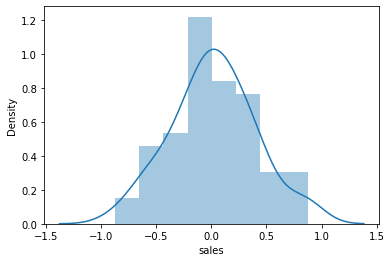

In [47]:
#plot normal curve
sns.distplot(residuals)
plt.show()

In [48]:
from scipy.stats import skew
skew(residuals)

0.06955995079333084

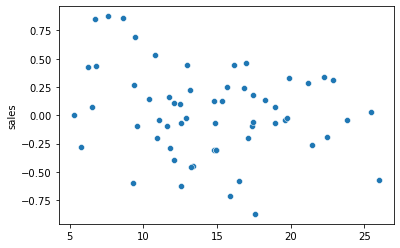

In [49]:
#next assumption
#relation should be linear regression
sns.scatterplot(y_pred,residuals)
plt.show()

In [50]:
#here there is linear relation ship between residuals and Y_pred 
#means input and output are related to each other
#but datpoints are scattered means heteroscedastic but should be homoscedastic
#means datapoints are close each other